In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 3.8, 6.5, 9.2, 11.3])
y

array([ 2.1,  3.8,  6.5,  9.2, 11.3])

In [40]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [41]:
def lasso_regression(X, y, alpha, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(num_iterations):
        y_pred = X.dot(theta)
        gradient = (X.T.dot(y_pred - y) + alpha * np.sign(theta)) / m
        theta -= learning_rate * gradient
    return theta

In [42]:
def ridge_regression(X, y, alpha, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(num_iterations):
        y_pred = X.dot(theta)
        gradient = (X.T.dot(y_pred - y) + alpha * theta) / m
        theta -= learning_rate * gradient
    return theta

In [43]:
alpha_ridge = 1.0
alpha_lasso = 0.1
num_iterations = 1000
learning_rate = 0.01

In [44]:
theta_ridge = ridge_regression(X_b, y, alpha_ridge, num_iterations, learning_rate)
theta_lasso = lasso_regression(X_b, y, alpha_lasso, num_iterations, learning_rate)


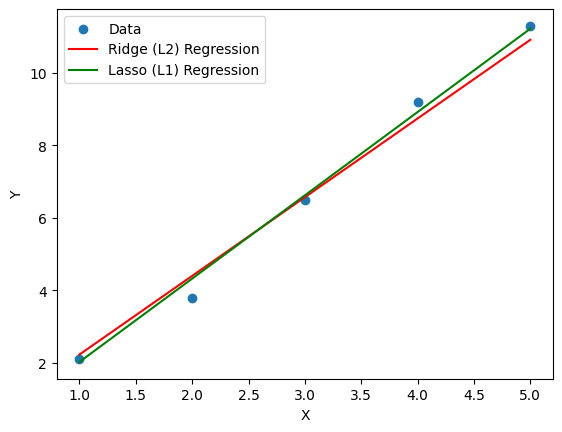

In [45]:
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta_ridge), label=f'Ridge (L2) Regression', color='red')
plt.plot(X, X_b.dot(theta_lasso), label=f'Lasso (L1) Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()